In [1]:
import numpy as np
import pandas as pd
from harmonic import HarmonicLandscape
from remd import RemdLadder
import adapt
from matplotlib import pyplot as pp
import math
%matplotlib inline

In [2]:
ladder_func = RemdLadder
opt_func = adapt.compute_derivative_log_total_acc

In [3]:
n_cond = 4
init_params = np.array([10., 5000., 9000., 10000.])

walkers = []
for t in init_params:
    p = np.array((t,))
    w = HarmonicLandscape(t, k=1.)
    walkers.append(w)

r = ladder_func(walkers, n_exchanges=None)

In [4]:
n_steps = 5000
coords = np.zeros((n_steps, n_cond))
for i in range(n_steps):
    r.update()
    x = np.array([w.x for w in r.walkers])
    coords[i, :] = x

In [5]:
acc1 = r.acceptance.copy()
a1 = np.product(acc1)

In [6]:
param_bounds = np.array([[10], [10000]])
lr = adapt.LearningRateDecay(np.array((100,)), 1e-2)
m = adapt.Adam(0.9, 0.9, opt_func, lr, param_bounds)
# m = adapt.MomentumSGD(0., opt_func, lr, param_bounds)
a = adapt.Adaptor(r, 64, m)

In [7]:
a.run(5000)

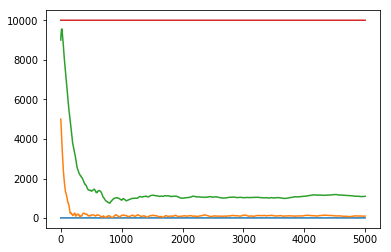

In [8]:
params = np.array(a.params)
pp.plot(params[:, :, 0]);

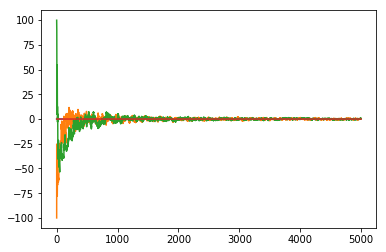

In [9]:
derivs = np.array(m.vs);
pp.plot(derivs[:, :, 0]);


-1.57927003569
99.877950595
7.2593123805
13.9761475072


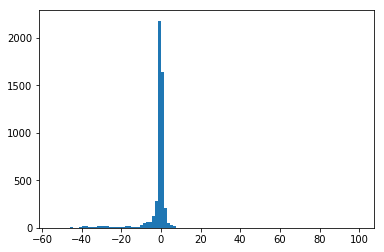

In [10]:
pp.hist(derivs[:, 2, 0], bins=100);
std = np.std(derivs[:, 2, 0])
mean = np.mean(derivs[:, 2, 0])
max_ = np.max(derivs[:, 2, 0])
print mean
print max_
print std
print (max_ - mean) / std

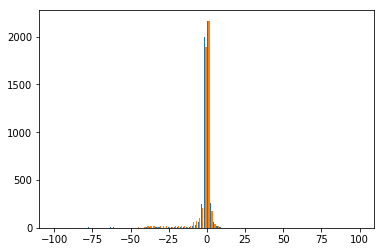

In [11]:
pp.hist(derivs[:, 1:3, 0], bins=100);

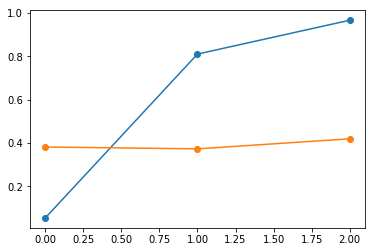

In [12]:
r.reset_stats()
for i in range(n_steps):
    r.update()

acc2 = r.acceptance.copy()
a2 = np.product(acc2)
pp.plot(acc1, marker='o')
pp.plot(acc2, marker='o')

In [13]:
print a1, a2, a2 / a1

0.0423145702804 0.0596871188137 1.41055713004


In [14]:
print params[-1, :, :]

[[    10.        ]
 [   104.57362804]
 [  1103.64982156]
 [ 10000.        ]]
